#**Registro de ventas de una firma de venta de café**
##Los datos corresponden a las ventas en tres sucursales ubicadas en New York, entre el 01/01/2023 y el 30/06/2023
Se analizarán no sólo las ventas sino el tipo de productos vendidos en cada sucursal.

Data set extraído de Maven Analytics (https://mavenanalytics.io/data-playground/coffee-shop-sales)

Alumno: Cordoba Juan Pablo

##Carga de libraries y del data set

In [3]:
#Importar libraries para la carga
import pandas as pd

In [4]:
# Carga del data set como "data"
# Visualización del encabezado como confirmación de la correcta carga

data=pd.read_excel('Coffee_Shop_Sales.xlsx')
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
#Visualización de las últimas filas del data set
data.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


##Adición de columna de datos

Se agrega una columna al data set, llamada "total_paid", para tener el monto total de cada transacción

In [6]:
# Calculo de total_paid y confirmación de su creación
data['total_paid'] = data['transaction_qty'] * data['unit_price']
display(data.head())

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_paid
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [7]:
#Nombre de las columnas

data.columns


Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'total_paid'],
      dtype='object')

##**Diccionario**
###Significado de cada columna  


**transaction_id**: Número de identificación de cada venta

**transaction_date**: Fecha de la

**transaction_time**: Horario de la transacción

**transaction_qty**: Cantidad de items vendidos

**store_id**: Número de identificación de la sucursal

**store_location**: Ubicación de la sucursal

**product_id**: Número de identificación del producto vendido

**unit_price**: Precio unitario del producto vendido

**product_category**: Categoría del producto vendido

**product_type**: Tipo de producto

**product_detail**: Detalle del producto vendido

**total_paid**: monto total de la transacción

##Cambio de nombre de columnas. Exploración de los datos

In [8]:
# Renombrar las columnas transanction_date y transaction_time como Date y Time, respectivamete

data.rename(columns={'transaction_date':'Date','transaction_time':'Time'},inplace=True)

In [9]:
#Información de la cantidad de datos: cantidad de registros, nro de columnas
data.shape

(149116, 12)

In [10]:
#Descripción de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   Date              149116 non-null  datetime64[ns]
 2   Time              149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  total_paid        149116 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 13.7+ MB


Se tienen 12 columnas, con 149116 registros, **ninguno tiene valores nulos**. Entre las variables, se encuentran números enteros (int64), formato fecha y hora (datetime64), nominales (object) y continuos (float64).

In [11]:
#Síntesis estadística

data.describe()

,transaction_id,Date,transaction_qty,store_id,product_id,unit_price,total_paid
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,4.686367
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,3.750000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,360.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,4.227099


La síntesis estadística solo tiene sentido para las variables "transaction_qty", "unit_price" y "total_paid". Sin embargo, de la de mayor valor informativo sería "total_paid", de la cual se puede analizar el monto vendido en las transacciones. En esta misma, se observa un valor máximo de 360, el cual estaría provocando un alto desvío estándar.

In [12]:
#Recuento de valores nulos por columna
null_counts = data.isnull().sum()

if null_counts.sum() == 0:
    print("No hay valores nulos")

No hay valores nulos


**No se encuentran valores nulos**

In [13]:
# Mostrar el recuento de filas duplicadas
print("\nRecuento de filas duplicadas:")
print(data.duplicated().sum())


Recuento de filas duplicadas:
0


**No se hallan filas con valores duplicados**

In [14]:
#Identificación de outliers
Q1=data['transaction_qty'].quantile(0.25)
Q3=data['transaction_qty'].quantile(0.75)
IQR=Q3-Q1
outliers=data[(data['transaction_qty']<(Q1-1.5*IQR))|(data['transaction_qty']>(Q3+1.5*IQR))]
print(outliers)

        transaction_id       Date      Time  transaction_qty  store_id  \
4163              4193 2023-01-08  12:58:32                4         5   
4352              4382 2023-01-08  19:32:15                4         5   
9310              9340 2023-01-17  09:05:20                8         8   
9365              9395 2023-01-17  09:55:47                8         8   
16490            16520 2023-01-30  08:49:26                4         5   
21416            21473 2023-02-08  10:41:55                4         5   
21532            21589 2023-02-08  12:58:32                4         5   
38494            38601 2023-03-08  10:01:24                4         5   
38550            38657 2023-03-08  10:41:55                4         5   
38707            38814 2023-03-08  13:38:14                4         5   
38953            39060 2023-03-08  19:32:15                4         5   
39176            39283 2023-03-09  09:04:04                6         5   
60777            60947 2023-04-08  10:

Se encuentran muchos valores como outliers. Esto deberá analizarse mejor en un gráfico boxplot para determinar su importancia o rareza. No obstante, de la tabla se deduce que los outliers de valor "total_paid" 360 corresponde a un tipo de producto (granos de café premium de tipo Civet Cat), encontrados en 10 operaciones.

In [15]:
# Convertir la columna 'transaction_time' a datetime
data['Time'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

In [16]:
#Para confirmar que la columna "transaction_time" es ahora de tipo "datetime"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   Date              149116 non-null  datetime64[ns]
 2   Time              149116 non-null  datetime64[ns]
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  total_paid        149116 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 13.7+ MB


##Generación de gráficos

array([[<Axes: title={'center': 'transaction_id'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'transaction_qty'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'product_id'}>],
       [<Axes: title={'center': 'unit_price'}>,
        <Axes: title={'center': 'total_paid'}>, <Axes: >]], dtype=object)

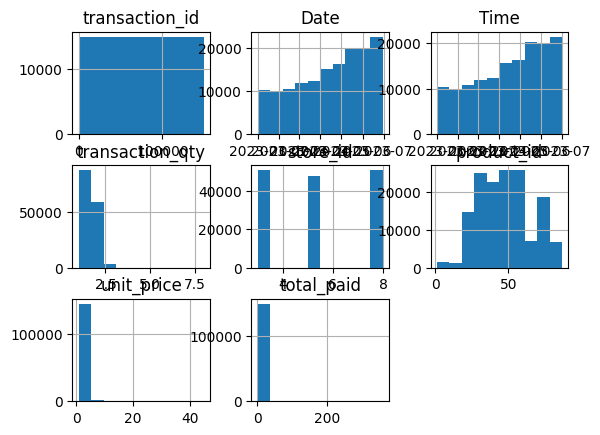

In [17]:
#Primera aproximación mediante histogramas de las columnas numéricas
data.hist()

A partir de estos histogramas directos, se podría decir que habría mayor cantidad de transacciones hacia el final del período de este data set, como así tambien hacia las horas de la tarde en los locales. La mayoría de las ventas son de 1 o 2 productos. La cantidad de ventas totales por local son equivalentes (levemente inferior en "Astoria (store_location 3). El volumen de venta de cada producto es diferente, pero se necesita un mejor gráfico para ver eso en detalle. El valor de cada producto es mayoritariamente menor a 10, mientras que en cada transacción se vende (total_paid) menos de 25. Se necesitan mejores gráficos.

In [18]:
#Se importan libraries para gráficos
import seaborn as sns

<Axes: >

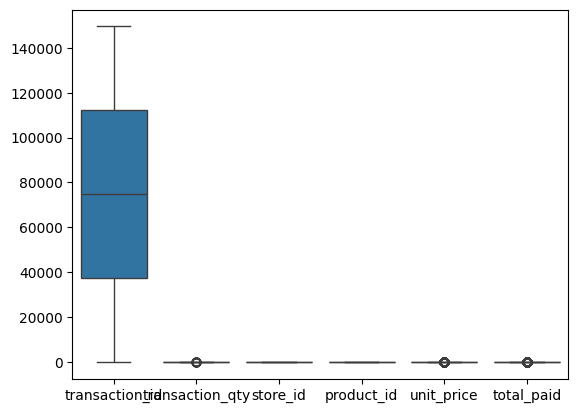

In [19]:
#Boxplot de todas las variables numéricas
sns.boxplot(data=data)

Este tipo de representación no permite ver con claridad la distribución de los datos y mucho menos la presencia de outliers.

In [20]:
#Se importan más libraries para gráficos
import matplotlib.pyplot as plt

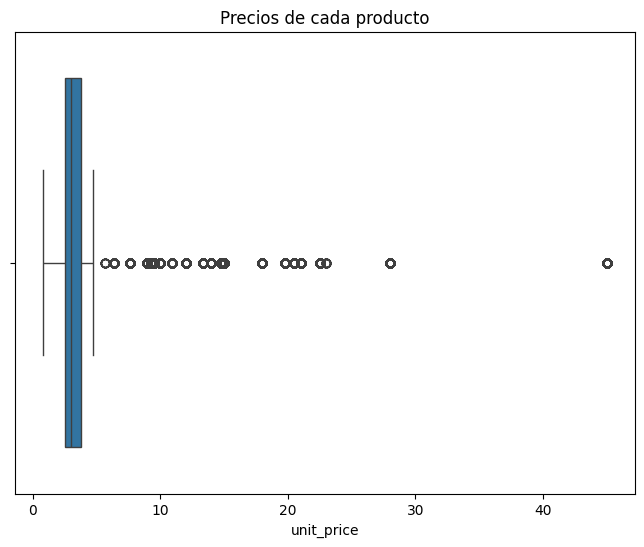

In [21]:
# Graficar boxplot para 'unit_price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['unit_price'])
plt.title('Precios de cada producto')
plt.show()

Aunque el gráfico se ve afectado por la presencia de varios outliers, se puede ver que la distribución de los datos se acerca a la normalidad (mean=3.38; q2=3). Sin embargo, la presencia de varios outliers muy por encima del q3 hace que la varianza sea alta (std=2.66) y que la gráfica no sea del todo clara.

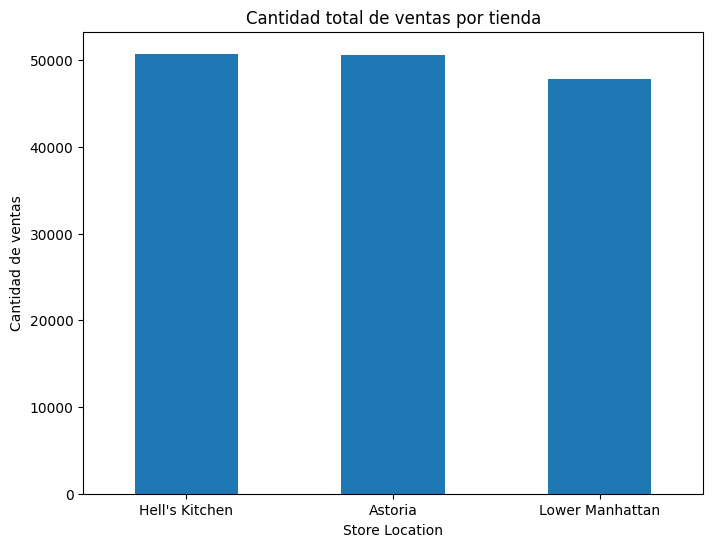

In [22]:
# Calcular el número total de transacciones para cada tienda
sales_by_location = data['store_location'].value_counts()

# Gráfico de barras para ver el total de ventas por tienda
plt.figure(figsize=(8, 6))
sales_by_location.plot(kind='bar')
plt.title('Cantidad total de ventas por tienda')
plt.xlabel('Store Location')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=0)
plt.show()

Las tres tiendas mantuvieron un volumen total de ventas equivalente (Lower Manhattan levemente inferior).

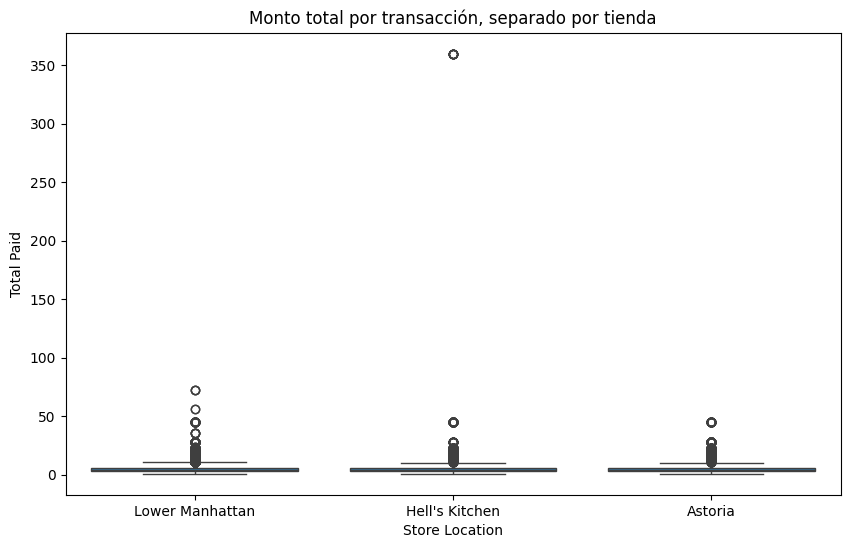

In [23]:
#Boxplot de total de cada transacción separado por cada tienda de venta
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_location', y='total_paid', data=data)
plt.title('Monto total por transacción, separado por tienda')
plt.xlabel('Store Location')
plt.ylabel('Total Paid')
plt.show()

Como se podía sospechar, la presencia de los valores "atipicos" en total_paid de 360 hace que al graficar esos outliers afectan a la escala y la visualización del gráfico. Dado que son poco valores (verdaderos outliers), se removerán para obtener una mejor visualización de los datos graficados.

##Limpieza de datos para mejorar los gráficos

In [24]:
# Remover filas donde "total_paid" es mayor a 100 (afecta solo a los de 360)
data = data[data['total_paid'] <= 100].copy()


In [25]:
#Descripción estadística de los datos para confirmar la eliminación de los outliers de 360
data.describe()

,transaction_id,Date,Time,transaction_qty,store_id,product_id,unit_price,total_paid
count,149106.000000,149106,149106,149106.000000,149106.000000,149106.000000,149106.000000,149106.000000
mean,74736.324065,2023-04-15 11:49:04.058589440,2023-04-16 00:03:20.320791808,1.437836,5.341884,47.921284,3.379428,4.662538
min,1.000000,2023-01-01 00:00:00,2023-01-01 07:06:11,1.000000,3.000000,1.000000,0.800000,0.800000
25%,37335.250000,2023-03-06 00:00:00,2023-03-06 13:35:22,1.000000,3.000000,33.000000,2.500000,3.000000
50%,74726.500000,2023-04-24 00:00:00,2023-04-24 08:22:04.500000,1.000000,5.000000,47.000000,3.000000,3.750000
75%,112092.750000,2023-05-30 00:00:00,2023-05-30 07:16:05,2.000000,8.000000,60.000000,3.750000,6.000000
max,149456.000000,2023-06-30 00:00:00,2023-06-30 20:57:19,6.000000,8.000000,87.000000,45.000000,72.000000
std,43153.053021,NaN,NaN,0.539859,2.074196,17.927641,2.636875,3.066261


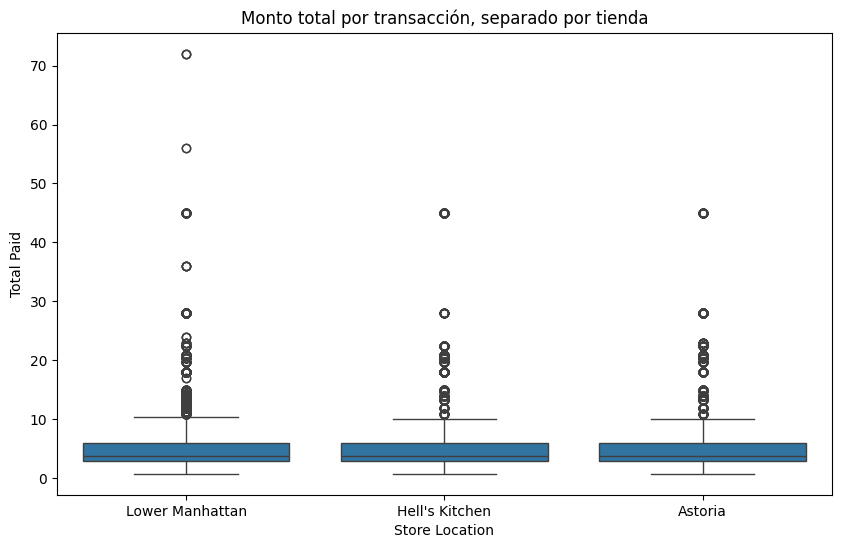

In [26]:
#Reversión de los boxplots, ahora sin los outliers de 360
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_location', y='total_paid', data=data)
plt.title('Monto total por transacción, separado por tienda')
plt.xlabel('Store Location')
plt.ylabel('Total Paid')
plt.show()

Aún se mantienen varios outliers altos. Se podrían eliminar más outliers (por ejemplo, por encima de 15, o bien hacer alguna transformación en los datos.

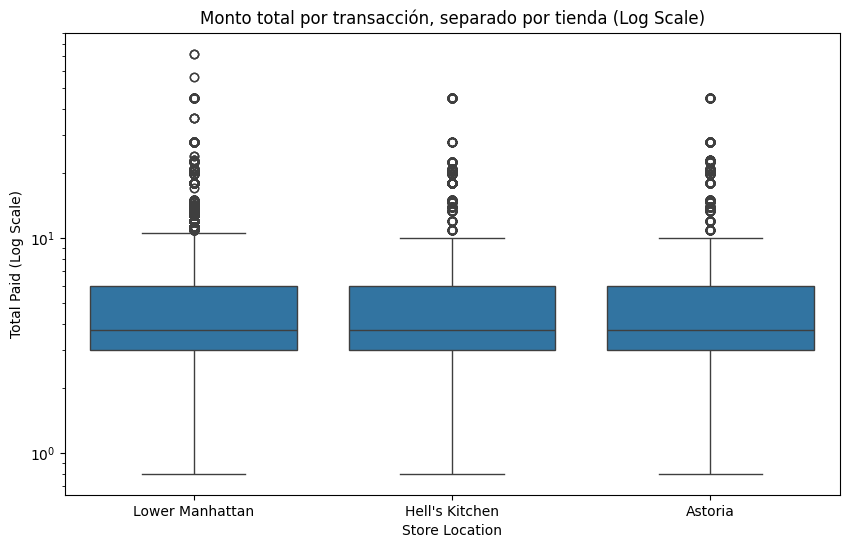

In [27]:
# Boxplot de total de cada transacción separado por cada tienda de venta con escala logaritmica
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_location', y='total_paid', data=data)
plt.title('Monto total por transacción, separado por tienda (Log Scale)')
plt.xlabel('Store Location')
plt.ylabel('Total Paid (Log Scale)')
plt.yscale('log') # Apply log scale to the y-axis
plt.show()

Al transformar los datos en su logaritmo, se logra una mejor visualización de
los mismos, sin necesidad de perder de vista los outliers. Se puede observar que en las 3 tiendas, el monto total en cada venta es similar.

##Agrupamiento de los datos para otros análisis

In [28]:
#Se crea una nueva columna, llamada "time_of_day", para distribuir las ventas en los tres momentos del día (morning, noon y afternoon).
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 15:
        return 'noon'
    elif 15 <= hour < 21:
        return 'afternoon'
    else:
        return 'otro'

data['time_of_day'] = data['Time'].dt.hour.apply(get_time_of_day)

# Se coloca la nueva columna a continuación de la columna "Time"
cols = data.columns.tolist()
time_index = cols.index('Time')
cols.insert(time_index + 1, cols.pop(cols.index('time_of_day')))
data = data[cols]

#Se despliegan las primeras filas para confirmar que el cambio fue exitoso
print("DataFrame con la nueva columna 'time_of_day' después de 'Time':")
display(data.head())

DataFrame con la nueva columna 'time_of_day' después de 'Time':


,transaction_id,Date,Time,time_of_day,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_paid
0,1,2023-01-01,2023-01-01 07:06:11,morning,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,2023-01-01 07:08:56,morning,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,2023-01-01 07:14:04,morning,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,2023-01-01 07:20:24,morning,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,2023-01-01 07:22:41,morning,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


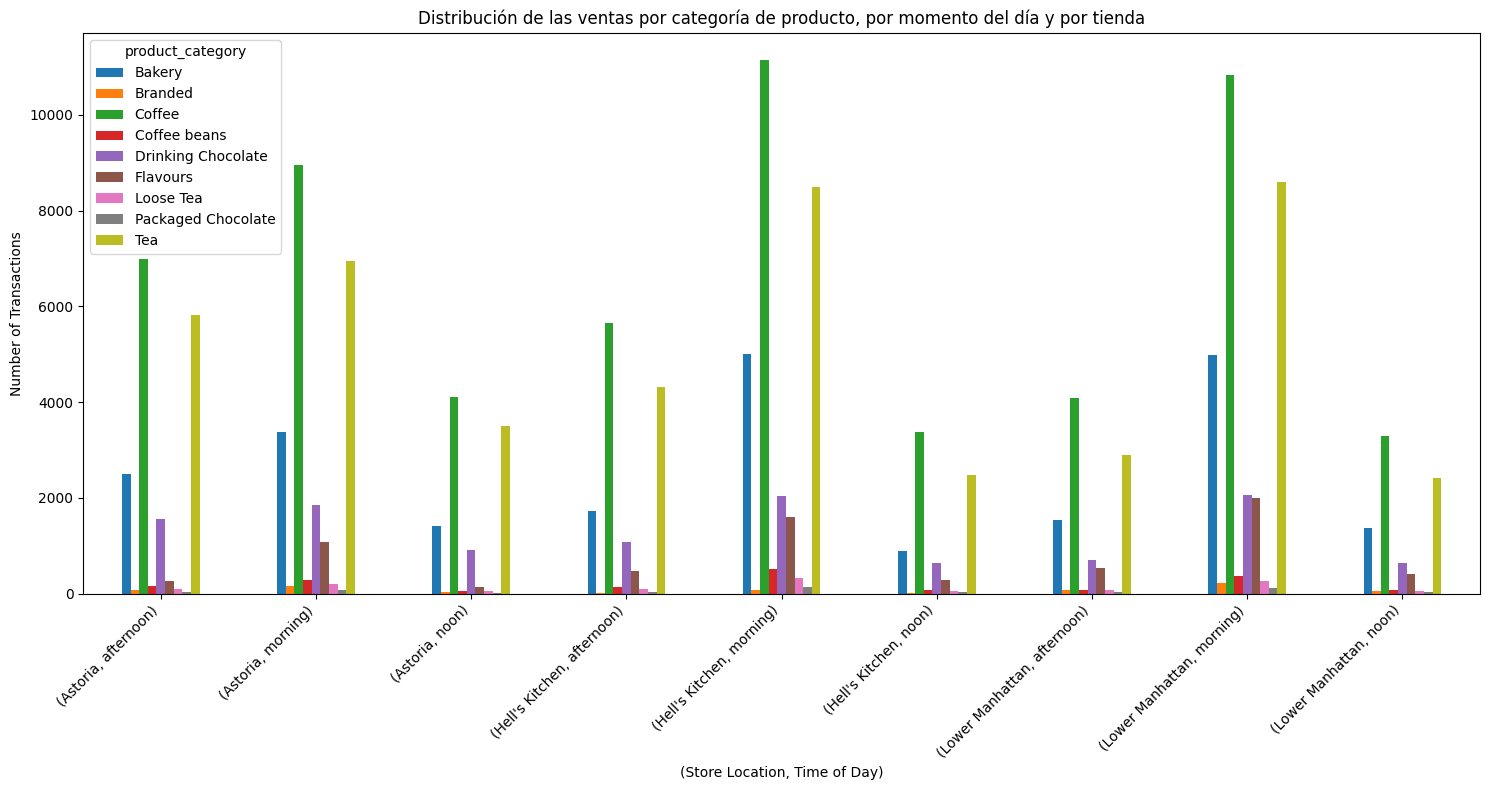

In [29]:
# Group by store location, time of day, and product category and count occurrences
sales_by_location_time_category = data.groupby(['store_location', 'time_of_day', 'product_category']).size().unstack(fill_value=0)

# Plotting
sales_by_location_time_category.plot(kind='bar', stacked=False, figsize=(15, 8))
plt.title('Distribución de las ventas por categoría de producto, por momento del día y por tienda')
plt.xlabel('(Store Location, Time of Day)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Al visualizar el número de transacciones por cada local, en cada momento del día, se puede concluir que: el café es lo que más se vende, sobre todo en las mañanas (mañana>tarde>mediodia). Le sigue en importancia el té, con la misma tendencia horaria. Le siguen la pasteleria (Bakery) y el chocolate para tomar. El resto de los productos (mercadería de la marca, granos de cafe sueltos, té suelto, chocolate para llevar y saborizantes de bebidas) representan un menor volumen de transacciones. Por las mañanas, la tienda en Hell's Kitchen es la que más bebidas y pastelería vende. Hacia los mediodías, este liderazgo lo toma la tienda de Astoria y lo mantiene durante la tarde.

Con el objetivo de establecer un modelo de predicción de suministros necesarios para dada sucursal, dado por el volumen de ventas, implementaría un modelo de aprendizaje **supervisado**. En el mismo, y dado que el registro es temporal (a lo largo de un periodo de 6 meses) evaluaría la evolución de las ventas por cada producto y sucursal. Entonces las variables feature serían store_location (sucursal) y date (fecha) y la variable target u objetivo sería transaction_qty (venta, en cantidad de ítems).


##**Implementación de un modelo de machine learning**
Se implementará un modelo de ML **supervisado**, tomando las variables date (fecha) y store_location (sucursal) como variables features para la predicción del volumen de venta de cada producto o tipo de producto (product_id o product_type, la variable target). Con esto se pretende lograr un mejor manejo de stock de mercadería, manteniendo la disponibilidad de cada producto de la carta y minimizando las pérdidas por vencimiento o sobrestockeo.


### Creación de la columna "season" (temporada)

Tomando como referencia la fecha, se determinó que las ventas entre el 01.01.2023 y el 31.03.2023 corresponden a la temporada de invierno (winter) y que las ventas entre el 01.04.2023 y el final del df 30.06.2023 corresponden a la temporada de primavera. Con esto se busca encontrar preferencia estacional, o sea variación sobre los productos, que al tomar todos juntos los datos del df se diluiría.

Luego de la clasificación en "season", se muestra el encabezado de la tabla con la nueva columna creada:

In [62]:
def get_season(date):
    if (date.month >= 1 and date.month <=3):
        return 'Winter'
    elif (date.month >= 4 and date.month <= 6):
        return 'Spring'

data['season'] = data['Date'].apply(get_season)

display(data.head())

,transaction_id,Date,Time,time_of_day,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_paid,season
0,1,2023-01-01,2023-01-01 07:06:11,morning,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Winter
1,2,2023-01-01,2023-01-01 07:08:56,morning,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Winter
2,3,2023-01-01,2023-01-01 07:14:04,morning,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Winter
3,4,2023-01-01,2023-01-01 07:20:24,morning,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Winter
4,5,2023-01-01,2023-01-01 07:22:41,morning,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Winter


### Identificación de los 5 tipos de producto más vendidos

Para cada sucursal se listan los 5 tipos de producto (product_type) más vendidos (basado en transaction_qty) en cada temporada (season). De esta manera se ordena la demanda de cada tipo de producto y se pretende encontrar si existe estacionalidad.


In [71]:
print("Top 5 Product Types by Season and Store Location:")
display(top_5_product_types)

Top 5 Product Types by Season and Store Location:


,season,store_location,product_type,transaction_qty
0,Spring,Astoria,Brewed Chai tea,5883
1,Spring,Astoria,Gourmet brewed coffee,5700
2,Spring,Astoria,Barista Espresso,4640
3,Spring,Astoria,Hot chocolate,4019
4,Spring,Astoria,Brewed herbal tea,3836
5,Spring,Hell's Kitchen,Barista Espresso,5738
6,Spring,Hell's Kitchen,Brewed Chai tea,5539
7,Spring,Hell's Kitchen,Gourmet brewed coffee,5355
8,Spring,Hell's Kitchen,Hot chocolate,3597
9,Spring,Hell's Kitchen,Brewed Black tea,3551


A partir de esta visualización, se encuentra que para algunos tipos de producto hay cambios estacionales en el volumen de ventas, aunque los mismos 5 grupos del invierno se mantienen en el top 5 en primavera. Para indagar mayores diferencias, se podría tomar el product_id o product_detail (producto específico) en lugar del tipo de producto (categorías que incluyen varios product_id).

###Modelado
Se resume la tabla anterior a sólo la categoría de mayor venta en cada sucursal por cada temporada. De esta manera, se modelará para cada situacion (categoria de producto, temporada y sucursal). Se tomará una sola categoría como ejemplo, aunque se debe proceder de la misma forma para todas si se desea obtener una predicción completa y lo más precisa posible, ya que se "libera" del factor estacionalidad, muy relevante en el rubro gastronómico.



In [73]:
top_product_by_season_location = top_5_product_types.groupby(['season', 'store_location']).head(1).reset_index(drop=True)
print("Top selling product type for each season and store location:")
display(top_product_by_season_location)



Top selling product type for each season and store location:


,season,store_location,product_type,transaction_qty
0,Spring,Astoria,Brewed Chai tea,5883
1,Spring,Hell's Kitchen,Barista Espresso,5738
2,Spring,Lower Manhattan,Gourmet brewed coffee,5449
3,Winter,Astoria,Brewed Chai tea,3423
4,Winter,Hell's Kitchen,Barista Espresso,3326
5,Winter,Lower Manhattan,Barista Espresso,3137


Se tomará para el modelado a la categoría "Brewed Chai tea" para la sucursal "Astoria". El modelado se llevará a cabo tomando todos los datos del df. En los siguientes gráficos se muestran las ventas mensuales y semanales a lo largo del periodo. En ambos gráficos se observa una tendencia al aumento en el volumen de ventas a lo largo de los 6 meses, aunque tomados semanalmente, se ven algunas fluctuaciones importantes.

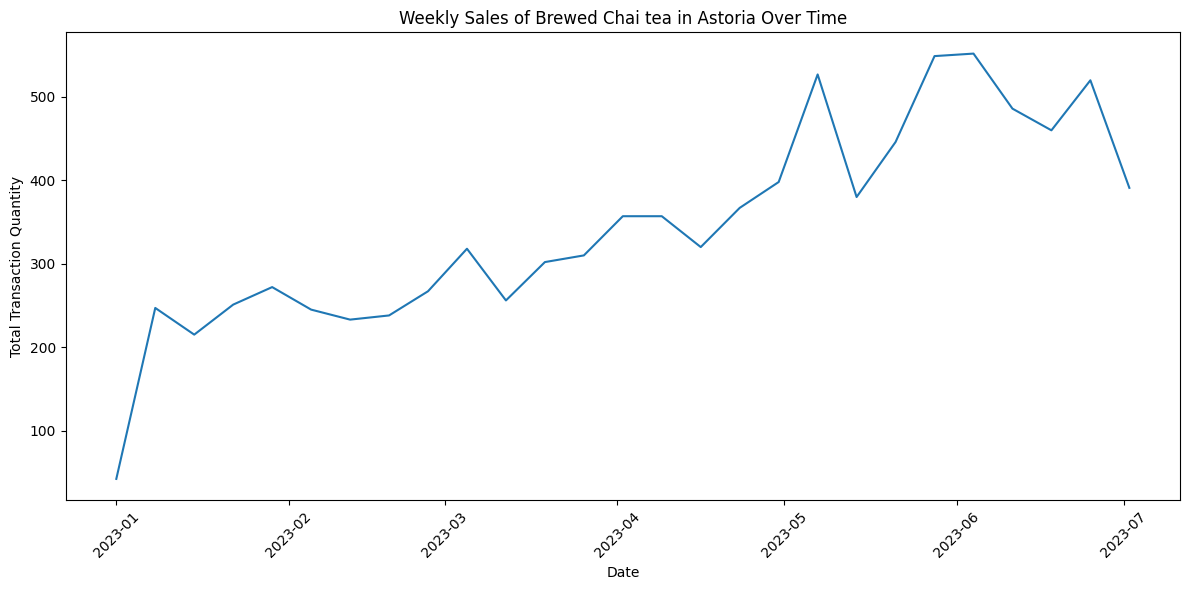

/tmp/ipython-input-765936171.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_chai_tea_astoria_sales.set_index('Date').resample('M')['transaction_qty'].sum().reset_index()


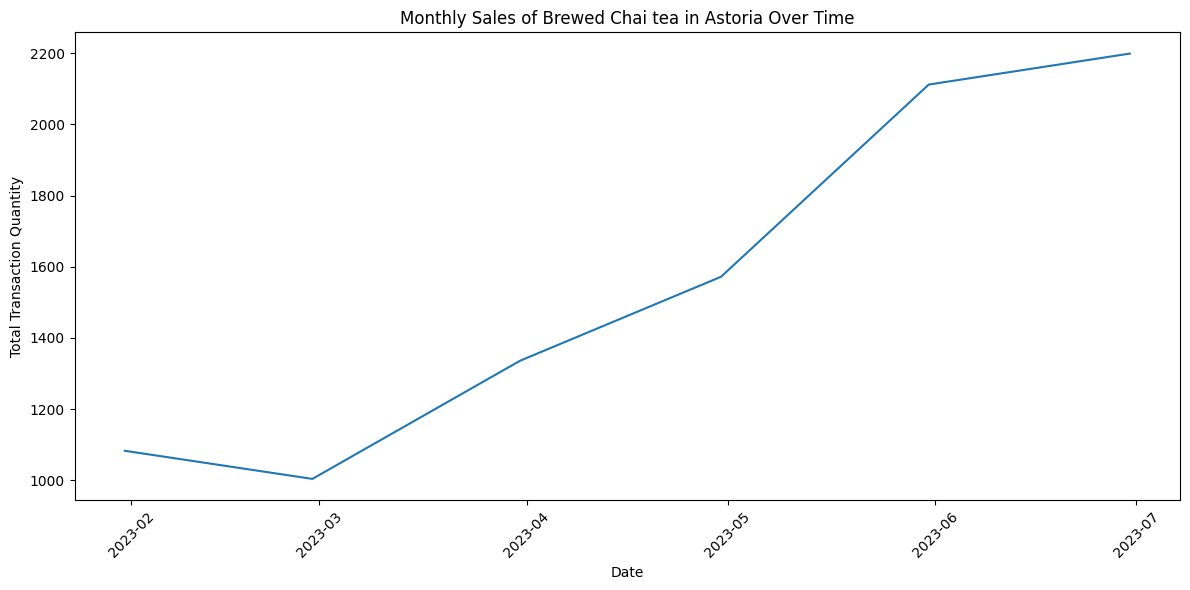

In [81]:
# Resample daily sales data to weekly frequency and plot
weekly_sales = daily_chai_tea_astoria_sales.set_index('Date').resample('W')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x='Date', y='transaction_qty')
plt.title('Weekly Sales of Brewed Chai tea in Astoria Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resample daily sales data to monthly frequency and plot
monthly_sales = daily_chai_tea_astoria_sales.set_index('Date').resample('M')['transaction_qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='transaction_qty')
plt.title('Monthly Sales of Brewed Chai tea in Astoria Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Para profundizar en el análisis del volumen de ventas, se grafican a continuación los registros diarios. De esta manera se observan fluctuaciones, que podrían encontrarse bajo cierto patrón correspondiente al día de la seamana específico.

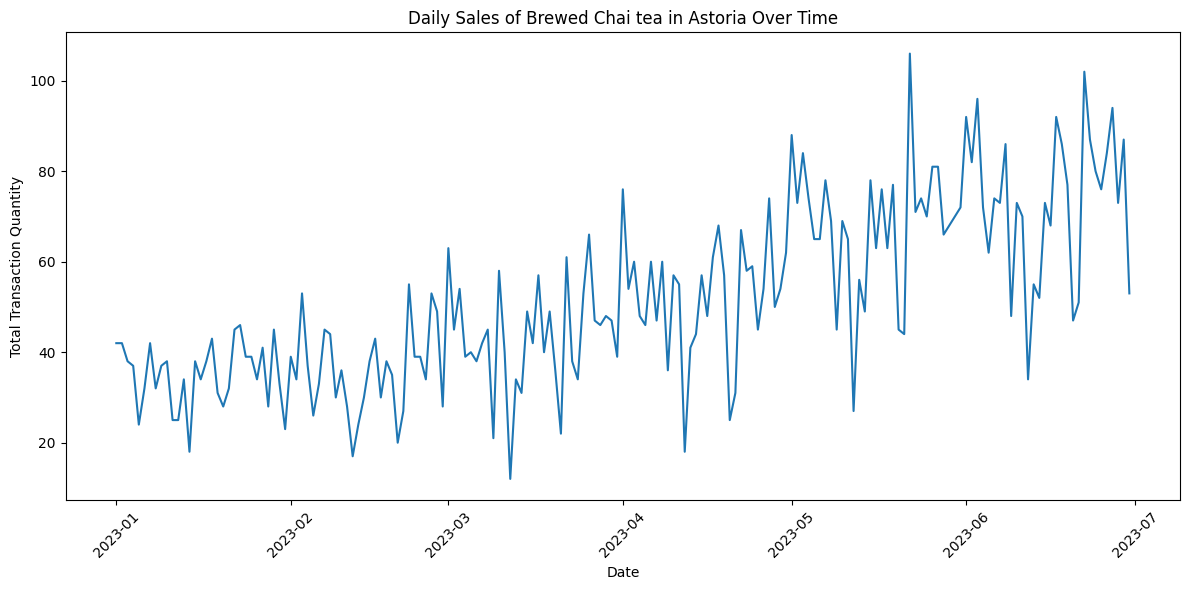

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for 'Brewed Chai tea' in Astoria
chai_tea_astoria_sales = data[
    (data['store_location'] == 'Astoria') &
    (data['product_type'] == 'Brewed Chai tea')
].copy()

# Aggregate sales by date
daily_chai_tea_astoria_sales = chai_tea_astoria_sales.groupby('Date')['transaction_qty'].sum().reset_index()

# Plot the sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_chai_tea_astoria_sales, x='Date', y='transaction_qty')
plt.title('Daily Sales of Brewed Chai tea in Astoria Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si bien se encontraron mayores fluctuaciones a nivel diario (lo cual haría más útil un modelo predictivo, con pronóstico diario), se tomarán los volúmenes semanales para entrenar al modelo. Se implementará el modelo Prophet, ya que está descripto como adecuado para análisis y modelado de datos temporales con patrones de fluctuaciones. El entrenamiento se lleva a cabo con el df completo, dadas las variaciones a lo largo del tiempo. Gracias a ese entrenamiento, se utiliza el modelo para pronosticar los volúmenes de ventas para los siguientes 6 meses. Al final se grafican: en el primer gráfico los datos de entreanamiento (puntos negros), se traza la línea de tendencia pronosticada (azul) y se señala el intervalo de incertidumbre del modelo (sombreado celeste). En el segundo gráfico la tendencia (trend) a lo largo del período en un ajuste lineal. En el tercer gráfico, el componente de variación para cada día de la semana. Es decir, para cada día día de la semana, el valor pronosticado en función del promedio pronosticado por la tendencia. O sea, por ejemplo, un valor de -10 significa que para ese día específico se espera un total de ventas menor a la tendencia, en 10 unidades.

INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgipmcj7m/kkib4vr4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgipmcj7m/fo8qyic4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18118', 'data', 'file=/tmp/tmpgipmcj7m/kkib4vr4.json', 'init=/tmp/tmpgipmcj7m/fo8qyic4.json', 'output', 'file=/tmp/tmpgipmcj7m/prophet_modely4m1x__x/prophet_model-20251021101130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:11:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Predicted Weekly Sales for Brewed Chai tea in Astoria (Same period next year):


,ds,yhat,yhat_lower,yhat_upper
27,2023-07-09,534.231893,464.802561,603.274937
28,2023-07-16,547.775722,480.009398,621.805194
29,2023-07-23,561.319552,487.687678,625.035491
30,2023-07-30,574.863381,506.318444,643.696916
31,2023-08-06,588.407211,516.045109,657.986396


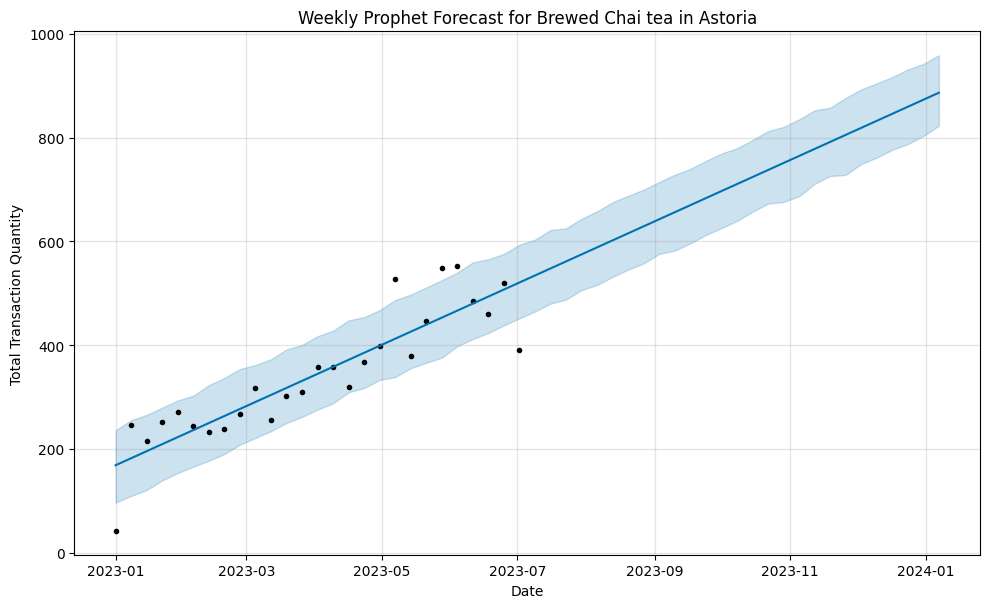

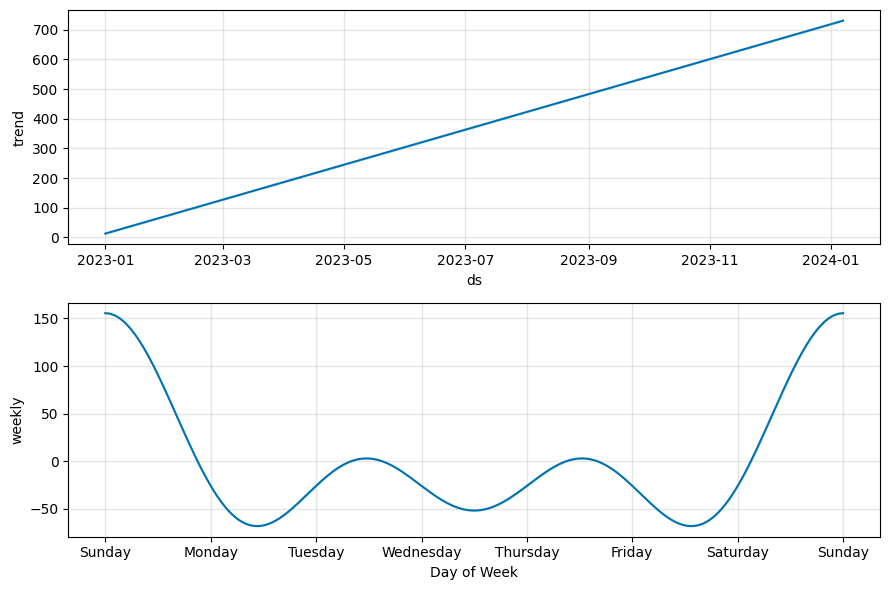

In [84]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Use the weekly sales data generated previously
prophet_weekly_data = weekly_sales.copy()

# Prepare data for Prophet (requires 'ds' and 'y' columns)
prophet_weekly_data['ds'] = prophet_weekly_data['Date']
prophet_weekly_data['y'] = prophet_weekly_data['transaction_qty']

# Create and fit the Prophet model
# We will enable weekly seasonality as we observed it in the plots
model_weekly = Prophet(weekly_seasonality=True, yearly_seasonality=False, daily_seasonality=False)
model_weekly.fit(prophet_weekly_data[['ds', 'y']])

# Create future dataframe for prediction (same period next year)
# Find the start and end dates of the weekly data
start_date = prophet_weekly_data['ds'].min()
end_date = prophet_weekly_data['ds'].max()

# Calculate the duration in days
duration_days = (end_date - start_date).days

# Create future dates for the same period next year
# Prophet's make_future_dataframe generates dates sequentially
# We can calculate the number of weeks to forecast to cover the same period
number_of_weeks_to_forecast = len(prophet_weekly_data) # Same number of weeks as the historical data

future_weekly = model_weekly.make_future_dataframe(periods=number_of_weeks_to_forecast, freq='W')


# Make predictions
forecast_weekly = model_weekly.predict(future_weekly)

# Display the predictions for the next year (adjusting for the historical period)
# Filter the forecast to show only the predicted period (assuming the same number of weeks as the historical data)
predicted_period_start_index = len(prophet_weekly_data)
predicted_weekly_sales = forecast_weekly.iloc[predicted_period_start_index:].copy()


print("Predicted Weekly Sales for Brewed Chai tea in Astoria (Same period next year):")
display(predicted_weekly_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Plot the forecast
fig = model_weekly.plot(forecast_weekly)
plt.title('Weekly Prophet Forecast for Brewed Chai tea in Astoria')
plt.xlabel('Date')
plt.ylabel('Total Transaction Quantity')
plt.show()

# Plot the components of the forecast
fig2 = model_weekly.plot_components(forecast_weekly)
plt.show()

###Evaluación del modelo
Se aplicarán metricas de evaluación de cómo se ajusta el modelo planteado a los datos, como el error absoluto medio (MAE), el error cuadrático medio (MSE) y el ajuste (R-cuadrado).

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy

# Make predictions on the historical data
forecast_historical = model_weekly.predict(prophet_weekly_data[['ds']])

# Extract actual values from the historical data
actual_historical = prophet_weekly_data['y']

# Extract predicted values
predicted_historical = forecast_historical['yhat']

# Calculate evaluation metrics
mae = mean_absolute_error(actual_historical, predicted_historical)
mse = mean_squared_error(actual_historical, predicted_historical)
r2 = r2_score(actual_historical, predicted_historical)

print("Prophet Model Fit Statistics for Weekly Sales:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Prophet Model Fit Statistics for Weekly Sales:
Mean Absolute Error (MAE): 40.3660
Mean Squared Error (MSE): 3065.2981
R-squared: 0.7841


###Conclusiones y discusión
Se aplicó un modelo supervisado de tipo Prophet para el pronóstico de ventas, para cada sucursal, por tipo de producto, por temporada del año. Se tomó como ejemplo para este trabajo la categoría de productos de tipo "Brewed Chai tea", las más vendida en la sucursal Astoria, a lo largo de los 6 meses que dura el registro disponible. Como resultado, se tiene un pronóstico para los siguientes 6 meses, para lo cual se tiene la línea de tendencia (pronóstico). Si bien se observó que no hay grandes cambios en las 5 categorías más vendidas a lo largo de las temporadas estudiadas, lo correcto sería tener disponibles para tomar los datos de al menos un año completo, para poder pronosticar cada temporada adecuadamente.

En el análisis de variación para cada día de la semana, se observa un mayor volumen de ventas los días domingo, algo esperable para el tipo de rubro (gastronomía).

Las métricas de ajuste del modelo propuesto a los datos señalan un error absoluto de alrededor de 40 unidades (para este caso, cantidad de ítems vendidos), que representa un 20% para las primeras semanas del registro, un 10% hacia el final del registro y un 5% hacia el final del periodo pronosticado. Por otro lado, el parámetro R-cuadrado señala un ajuste del modelo a los datos de alrededor del 78%, lo cual es aceptable, pero tal vez se podría mejorar si se eliminaran algunos outliers como se procedió en la etapa de visualización de los datos.

##Resumen de hallazgos
A través del registro de ventas de productos en tres sucursales de una firma gastronómica, se pudo observar que:

- la cantidad total de transacciones en el periodo registrado es similar en todas;

- que cada transacción es mayoritariamente menor a 25usd y,

- en general de 1 o 2 ítems.

Siguiendo esta información, se podrían aplicar estrategias de marketing como ventas de combos o menúes que faciliten la combinación de más ítems por venta.


Entre todos los productos ofrecidos, el café y el té son lo que más se vende, sobre todo en las mañanas. Junto a productos de bakery y chocolate para tomar constituyen la gran mayoría de las ventas.

Por las mañanas, la tienda en Hell's Kitchen es la que más bebidas y pastelería vende. Hacia los mediodías, este liderazgo lo toma la tienda de Astoria y lo mantiene durante la tarde. Esta diferencia depende de la localización y el tipo de clientes que visitan cada tienda.


Si bien no se tiene el registro de un año completo, se pudo ver que habría cambios estacionales en la preferencia de tipo de productos. Si se profundizara el análisis para cada producto en particular, es probable que aparezcan mayores diferencias.


Se aplicó un modelo, a manera de ejemplo, para el pronóstico de ventas de cada categoría de producto, por sucursal. En el mismo se encontró un ajuste aceptable de 78%, aunque mejorable. Se debería proceder de la misma manera para todas las categorías y sucursales, de manera de evaluar correctamente la fuerza del modelo. Algunas formas de mejorar el ajuste podría ser especificar por producto (no por su categoría) y/o trabajar con los valores outliers (transformándolos o eliminándolos).
